In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('diabetes.csv')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df = df.drop([0], axis = 0)

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0


In [7]:
# split dataset in features and target variable
feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = df[feature_cols]
y = df['Outcome']

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.80,test_size=0.20,random_state=100)

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
# Create Decision Tree classifier object
DTC = DecisionTreeClassifier()

In [12]:
## training the Model
DTC.fit(X_train,y_train)

DecisionTreeClassifier()

In [13]:
y_train_pred = DTC.predict(X_train)

In [14]:
from sklearn import metrics

In [15]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy on Train:", metrics.accuracy_score(y_train, y_train_pred))

Accuracy on Train: 1.0


In [16]:
## making prediction
y_pred = DTC.predict(X_test)

In [17]:
print("Accuracy on Test:", metrics.accuracy_score(y_test, y_pred))

Accuracy on Test: 0.7272727272727273


## Visualize Decision Tree


In [18]:
#pip install graphviz
#conda install python-graphviz
#pip install pydotplus
#pip install pydot

In [19]:
from six import StringIO
from IPython.display import Image 
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree
from pydot import graph_from_dot_data
from sklearn import tree
import pydotplus
#import graphviz

In [20]:
feature_cols = list(df.columns)
feature_cols.remove('Outcome')
print(feature_cols)

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


##  Visualize Decision Tree

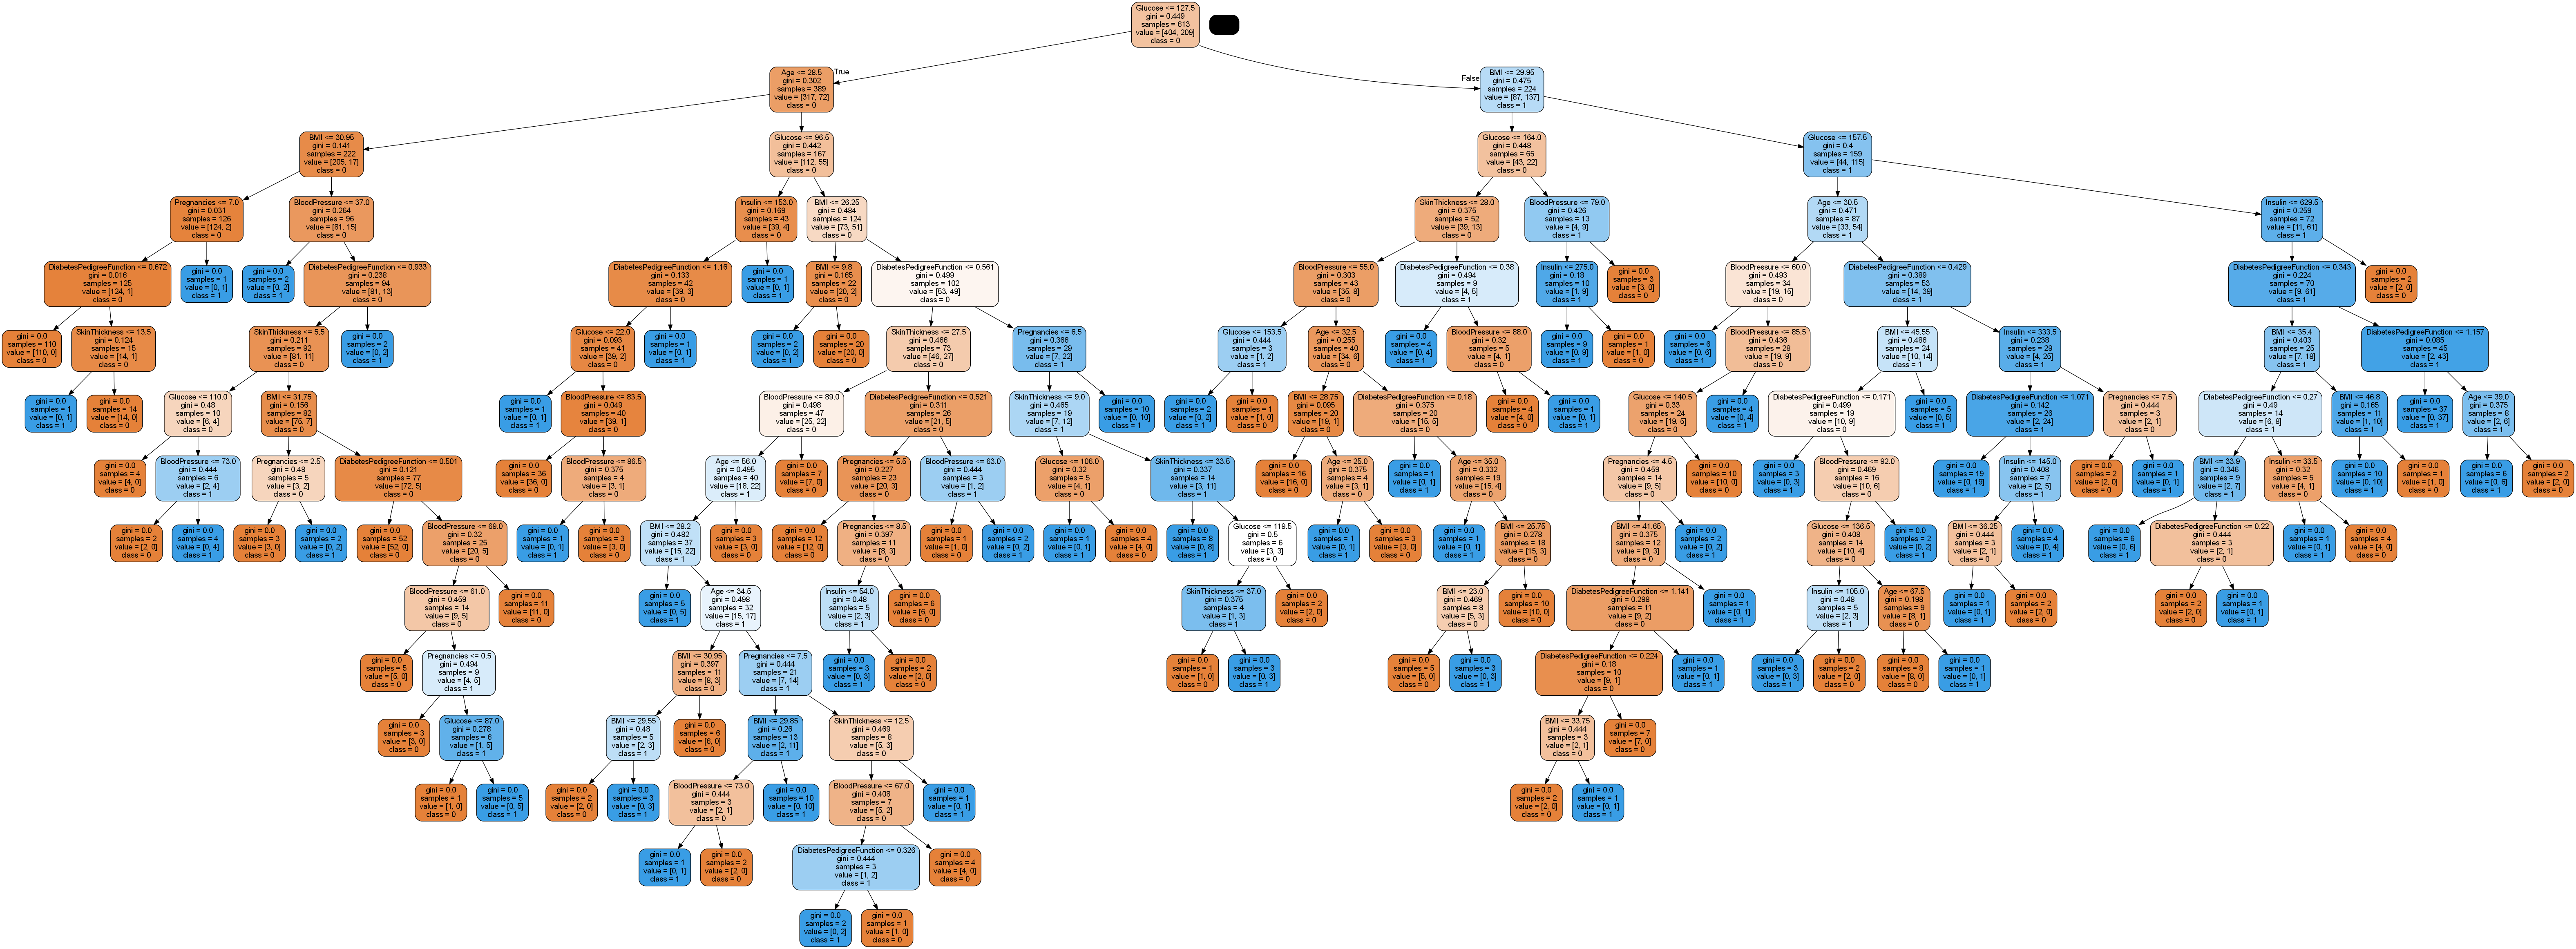

In [21]:
dot_data = StringIO()
export_graphviz(DTC, out_file = dot_data,
               filled = True,
               rounded = True,
               feature_names = feature_cols,
               class_names = ['0', '1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())

## Optimizing Decision Tree Performance : Truncation

In [22]:
# max_depth
# create Decision Tree classifier object
DTC = DecisionTreeClassifier(criterion = 'entropy',max_depth = 3)

In [23]:
# Fit the Model
DTC.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [24]:
# Predict
y_train_pred = DTC.predict(X_train)

In [25]:
#Model Accuracy, how often is the classifier correct?
print("Accuracy train:", metrics.accuracy_score(y_train, y_train_pred))

Accuracy train: 0.7699836867862969


In [26]:
# Predict the response for test dataset
y_pred = DTC.predict(X_test)

In [27]:
#Model Accuracy, how often is the classifier correct?
print("Accuracy test:", metrics.accuracy_score(y_test, y_pred))

Accuracy test: 0.7402597402597403


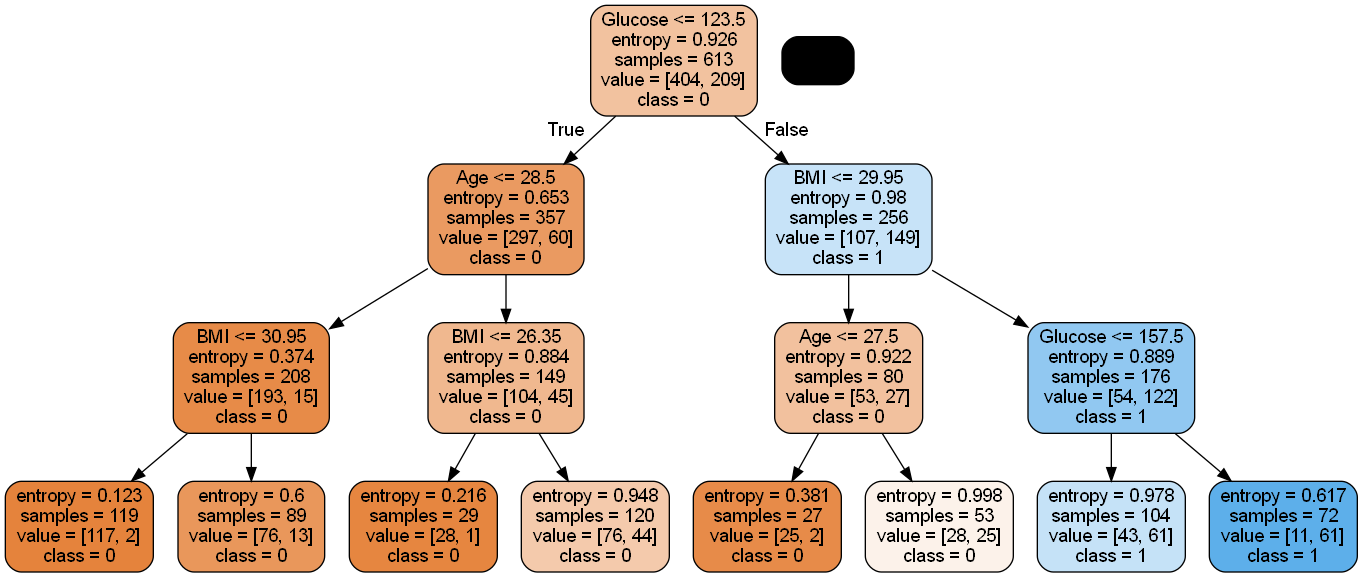

In [28]:
# visualize decision tree
dot_data = StringIO()
export_graphviz(DTC,
                out_file = dot_data,
               filled = True,
               rounded = True,
               feature_names = feature_cols,
               class_names = ['0', '1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [29]:
# create Decision tree classifier object
DTC = DecisionTreeClassifier(criterion='gini', max_depth=5)

#Train Decision tree classifier
DTC = DTC.fit(X_train, y_train)

#Predict the response for the dataset
y_pred = DTC.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy :", metrics.accuracy_score(y_test,y_pred))

Accuracy : 0.7597402597402597


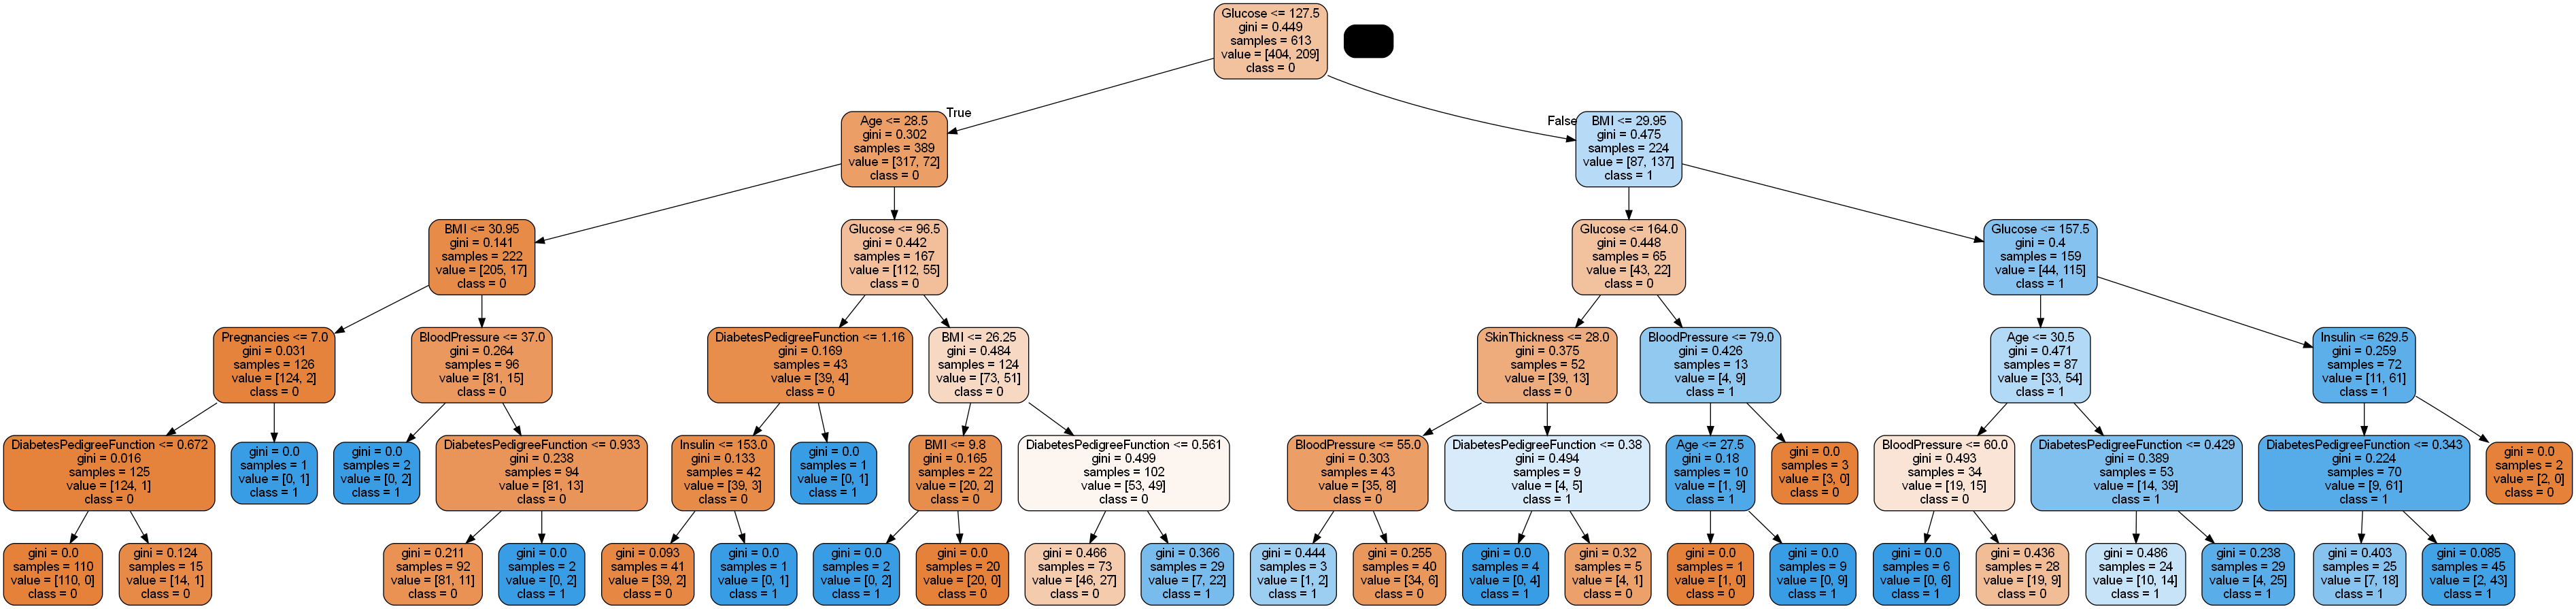

In [30]:
# visualize decision tree
dot_data = StringIO()
export_graphviz(DTC, out_file = dot_data,
               filled = True,
               rounded = True,
               feature_names = feature_cols, class_names = ['0', '1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())

In [31]:
#create Decision tree classifier object
DTC = DecisionTreeClassifier(criterion='gini', max_leaf_nodes=10)

#Train Decision tree classifier
DTC = DTC.fit(X_train, y_train)

#Predict the response for the dataset
y_pred = DTC.predict(X_test)

#Model Accuracy, how often is the classifier correct?
print("Accuracy :", metrics.accuracy_score(y_test,y_pred))

Accuracy : 0.7662337662337663


In [32]:
# visualize decision tree
dot_data = StringIO()
export_graphviz(DTC, out_file=dot_data,
               filled=True,
               rounded=True,
               feature_names=feature_cols, class_names=['0', '1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image=(graph.create_png())

# Choosing optimal Hyperparameters for tree

# Grid Search

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
# dictionary of hyperparameters as key value to be tried

dict = {
    'max_depth' : [3,5,7,9],
    'min_samples_leaf' : [5,10,15,20],
    'criterion' : ['gini', 'entropy']
}

In [35]:
dict

{'max_depth': [3, 5, 7, 9],
 'min_samples_leaf': [5, 10, 15, 20],
 'criterion': ['gini', 'entropy']}

In [36]:
# Instance of Decision tree
DTC= DecisionTreeClassifier()

In [37]:
# Instance of GridSearchCV

GS = GridSearchCV(estimator=DTC, param_grid=dict, cv=4, n_jobs=-1, verbose=1, scoring='accuracy')


In [38]:
GS.fit(X_train,y_train)

Fitting 4 folds for each of 32 candidates, totalling 128 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9],
                         'min_samples_leaf': [5, 10, 15, 20]},
             scoring='accuracy', verbose=1)

In [39]:
# best Estimator og GridSearch
GS.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5)

In [40]:
# Best Estimator of Decision Tree
DTC_best = GS.best_estimator_

In [41]:
GS.best_params_

{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 5}

In [42]:
DTC_final = DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=20)

In [43]:
DTC_final.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=20)

In [44]:
# Predict the response for test dataset

y_pred = DTC_best.predict(X_test)

#model Accuracy
print("Accuracy : ", metrics.accuracy_score(y_pred,y_test))

Accuracy :  0.7402597402597403


# Randomized SearchCV

In [45]:
from sklearn.model_selection import RandomizedSearchCV

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
RS = RandomizedSearchCV(RandomForestClassifier(), dict, n_iter=5, cv=10)

In [48]:
RS.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 7, 9],
                                        'min_samples_leaf': [5, 10, 15, 20]})

In [49]:
RS.best_params_

{'min_samples_leaf': 10, 'max_depth': 5, 'criterion': 'gini'}

In [50]:
RS.best_score_

0.7717345319936542

In [51]:
RS.best_estimator_

RandomForestClassifier(max_depth=5, min_samples_leaf=10)

In [52]:
# Predict the response for test dataset

y_pred = RS.predict(X_test)

#model Accuracy
print("Accuracy : ", metrics.accuracy_score(y_pred,y_test))

Accuracy :  0.7597402597402597
